In [ ]:
import os
os.chdir('/content/drive/My Drive/kaggle_study/weather contest')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data 준비

## Train data

In [ ]:
loc1 = pd.read_csv('plant1_loc1.csv')
loc2 = pd.read_csv('plant1_loc2.csv')
loc3 = pd.read_csv('plant1_loc3.csv')


In [ ]:
loc1.shape,loc2.shape,loc3.shape

((58749, 13), (58749, 13), (58749, 7))

In [ ]:
loc1.index= pd.to_datetime(loc1.datetime)
loc2.index= pd.to_datetime(loc2['plant1_train.mea_ddhr'])
loc3.index = pd.to_datetime(loc3['plant1_train.mea_ddhr'])

In [ ]:
from kaggle_study.KMA_Weather import preprocessing_24h48h

prep = preprocessing_24h48h

In [ ]:
loc1.columns,loc2.columns,loc3.columns

(Index(['datetime', 'plant1_train.tem_in_loc1', 'plant1_train.hum_in_loc1',
        'plant1_train.tem_coil_loc1', 'plant1_train.tem_out_loc1',
        'plant1_train.hum_out_loc1', 'plant1_train.cond_loc1', 'cond_with_swv',
        'swv_value', '24h_datetime', '24h_cond', '48h_datetime', '48h_cond'],
       dtype='object'),
 Index(['plant1_train.mea_ddhr', 'plant1_train.hum_in_loc2',
        'plant1_train.tem_in_loc2', 'plant1_train.tem_coil_loc2',
        'plant1_train.tem_out_loc1', 'plant1_train.hum_out_loc1',
        'plant1_train.cond_loc2', 'datetime', '24h_datetime', '48h_datetime',
        '24h_cond', '48h_cond', 'swv_value'],
       dtype='object'),
 Index(['plant1_train.mea_ddhr', 'plant1_train.tem_in_loc3',
        'plant1_train.hum_in_loc3', 'plant1_train.tem_coil_loc3',
        'plant1_train.tem_out_loc1', 'plant1_train.hum_out_loc1',
        'plant1_train.cond_loc3'],
       dtype='object'))

In [ ]:
loc2 = loc2[['plant1_train.tem_in_loc2',
        'plant1_train.hum_in_loc2', 'plant1_train.tem_coil_loc2',
        'plant1_train.tem_out_loc1', 'plant1_train.hum_out_loc1',]]

In [ ]:
loc2

,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1
plant1_train.mea_ddhr,,,,,
2016-04-01 00:00:00,14.00,23.00,11.00,9.00,42.00
2016-04-01 03:00:00,12.00,32.00,9.00,7.00,59.00
2016-04-01 06:00:00,11.00,37.00,9.00,6.00,56.00
2016-04-01 09:00:00,11.00,35.00,9.00,18.00,30.00
2016-04-01 12:00:00,15.00,27.00,11.00,18.00,20.00
...,...,...,...,...,...
2019-03-31 23:10:00,10.55,35.20,11.17,6.40,43.86
2019-03-31 23:20:00,10.55,35.53,11.09,6.34,44.02
2019-03-31 23:30:00,10.49,35.65,11.21,6.40,43.04


### preprocessing
- data resampling
- data interpolation filling nan data
- data scaling using minmax scaler
- create time series data set

In [ ]:
scaled_loc1 =prep.resampling_scaling(loc1,'3h',0,5)
scaled_loc2 =prep.resampling_scaling(loc2,'3h',0,5)
scaled_loc3 =prep.resampling_scaling(loc3,'3h',0,5)

In [ ]:
scaled_loc1.shape,scaled_loc2.shape,scaled_loc3.shape

((8760, 5), (8760, 5), (8760, 5))

In [ ]:
scaled_loc1

,0,1,2,3,4
0,0.535865,0.176688,0.439133,0.440193,0.408968
1,0.491042,0.227171,0.415271,0.400989,0.596872
2,0.468630,0.290274,0.415271,0.381387,0.563712
3,0.468630,0.290274,0.415271,0.616609,0.276330
4,0.535865,0.227171,0.415271,0.616609,0.165798
...,...,...,...,...,...
8755,0.406699,0.370653,0.424750,0.444374,0.360843
8756,0.444164,0.302158,0.440711,0.438679,0.358178
8757,0.446504,0.214852,0.443388,0.428736,0.294610
8758,0.423993,0.307718,0.434825,0.400869,0.392585


In [ ]:
loc1_x,loc1_y = prep.create_squence(scaled_loc1,16,0,5)
loc2_x,loc2_y = prep.create_squence(scaled_loc2,16,0,5)
loc3_x,loc3_y = prep.create_squence(scaled_loc3,16,0,5)

In [ ]:
(loc1_x.shape,loc1_y.shape),(loc2_x.shape,loc2_y.shape),(loc3_x.shape,loc3_y.shape)

(((8744, 16, 5), (8744, 5)),
 ((8744, 16, 5), (8744, 5)),
 ((8744, 16, 5), (8744, 5)))

In [ ]:
x_train= np.concatenate([loc1_x,loc2_x,loc3_x])
y_train =np.concatenate([loc1_y,loc2_y,loc3_y])

In [ ]:
x_train.shape,y_train.shape

((26232, 16, 5), (26232, 5))

## Test data

In [ ]:
all_test = pd.read_csv('plant_test_all_predict.csv')
print(all_test.shape)
all_test.head()

(3539, 13)


,Unnamed: 0,plant_test.mea_ddhr,plant_test.plant,plant_test.loc,plant_test.tem_in,plant_test.hum_in,plant_test.tem_coil,plant_test.tem_out_loc1,plant_test.hum_out_loc1,plant_test.x24h_tma,plant_test.x24h_cond_loc,plant_test.x48h_tma,plant_test.x48h_cond_loc
0,1,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN
1,2,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,0.0,2019-04-03 4:30,NaN
2,3,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN
3,4,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,0.0,2019-04-03 11:00,NaN
4,5,2019-04-01 13:30,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30,NaN


In [ ]:
test_p1_loc = all_test[(all_test['plant_test.plant']==1)]

In [ ]:
test_p1_loc.shape

(1841, 13)

In [ ]:
test_p1_loc

,Unnamed: 0,plant_test.mea_ddhr,plant_test.plant,plant_test.loc,plant_test.tem_in,plant_test.hum_in,plant_test.tem_coil,plant_test.tem_out_loc1,plant_test.hum_out_loc1,plant_test.x24h_tma,plant_test.x24h_cond_loc,plant_test.x48h_tma,plant_test.x48h_cond_loc
1,2,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,0.0,2019-04-03 4:30,NaN
3,4,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,0.0,2019-04-03 11:00,NaN
8,9,2019-04-02 6:00,1,2,7.34,46.98,10.33,1.36,64.53,2019-04-03 6:00,0.0,2019-04-04 6:00,NaN
9,10,2019-04-02 7:00,1,1,9.27,42.77,9.76,3.68,64.01,2019-04-03 7:00,0.0,2019-04-04 7:00,NaN
10,11,2019-04-02 9:30,1,1,10.55,51.86,10.06,13.39,41.36,2019-04-03 9:30,0.0,2019-04-04 9:30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,3533,2020-03-28 23:30,1,3,10.76,34.83,12.08,7.47,42.06,2020-03-29 23:30,NaN,2020-03-30 23:30,NaN
3533,3534,2020-03-29 2:30,1,3,9.82,35.04,11.43,6.46,41.61,2020-03-30 2:30,NaN,2020-03-31 2:30,NaN
3534,3535,2020-03-29 3:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 3:00,0.0,2020-03-31 3:00,NaN
3537,3538,2020-03-29 11:30,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30,0.0,2020-03-31 11:30,NaN


In [ ]:
test_p1_loc.index = pd.to_datetime(test_p1_loc['plant_test.mea_ddhr'])

In [ ]:
test_p1_loc.columns

Index(['Unnamed: 0', 'plant_test.mea_ddhr', 'plant_test.plant',
       'plant_test.loc', 'plant_test.tem_in', 'plant_test.hum_in',
       'plant_test.tem_coil', 'plant_test.tem_out_loc1',
       'plant_test.hum_out_loc1', 'plant_test.x24h_tma',
       'plant_test.x24h_cond_loc', 'plant_test.x48h_tma',
       'plant_test.x48h_cond_loc'],
      dtype='object')

In [ ]:
test_df = test_p1_loc[['plant_test.tem_in', 'plant_test.hum_in',
       'plant_test.tem_coil', 'plant_test.tem_out_loc1',
       'plant_test.hum_out_loc1']]
test_df

,plant_test.tem_in,plant_test.hum_in,plant_test.tem_coil,plant_test.tem_out_loc1,plant_test.hum_out_loc1
plant_test.mea_ddhr,,,,,
2019-04-01 04:30:00,10.03,48.81,10.79,6.09,59.34
2019-04-01 11:00:00,12.32,34.13,10.86,12.32,28.27
2019-04-02 06:00:00,7.34,46.98,10.33,1.36,64.53
2019-04-02 07:00:00,9.27,42.77,9.76,3.68,64.01
2019-04-02 09:30:00,10.55,51.86,10.06,13.39,41.36
...,...,...,...,...,...
2020-03-28 23:30:00,10.76,34.83,12.08,7.47,42.06
2020-03-29 02:30:00,9.82,35.04,11.43,6.46,41.61
2020-03-29 03:00:00,10.73,33.36,13.30,6.28,46.37


### preprocessing
- data scaling using minmax scaler
- create time series dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

In [ ]:
scaled_test = mms.fit_transform(test_df)
scaled_test

array([[0.34244032, 0.41093256, 0.34090212, 0.31356322, 0.52581103],
       [0.40318302, 0.20931191, 0.34305002, 0.45678161, 0.15794459],
       [0.27108753, 0.38579865, 0.32678736, 0.20482759, 0.58726024],
       ...,
       [0.36100796, 0.19873644, 0.41791961, 0.31793103, 0.37224722],
       [0.43554377, 0.20052191, 0.38416692, 0.47011494, 0.22188018],
       [0.45331565, 0.21343222, 0.40165695, 0.40068966, 0.343713  ]])

In [ ]:
scaled_test = pd.DataFrame(scaled_test)
scaled_test

,0,1,2,3,4
0,0.342440,0.410933,0.340902,0.313563,0.525811
1,0.403183,0.209312,0.343050,0.456782,0.157945
2,0.271088,0.385799,0.326787,0.204828,0.587260
3,0.322281,0.327977,0.309297,0.258161,0.581103
4,0.356233,0.452822,0.318503,0.481379,0.312929
...,...,...,...,...,...
1836,0.361804,0.218926,0.380485,0.345287,0.321217
1837,0.336870,0.221810,0.360540,0.322069,0.315889
1838,0.361008,0.198736,0.417920,0.317931,0.372247
1839,0.435544,0.200522,0.384167,0.470115,0.221880


In [ ]:
scaled_test.index = test_p1_loc.index

In [ ]:
x_test =prep.create_test_sequence(scaled_test,'2 days')

In [ ]:
x_test

array([array([[0.34244032, 0.41093256, 0.34090212, 0.31356322, 0.52581103],
       [0.40318302, 0.20931191, 0.34305002, 0.45678161, 0.15794459],
       [0.27108753, 0.38579865, 0.32678736, 0.20482759, 0.58726024],
       [0.32228117, 0.32797693, 0.30929733, 0.25816092, 0.58110348],
       [0.35623342, 0.45282241, 0.31850261, 0.48137931, 0.3129292 ],
       [0.40159151, 0.15231424, 0.34090212, 0.41195402, 0.14563107],
       [0.43872679, 0.0508172 , 0.35256214, 0.40482759, 0.08524745],
       [0.44376658, 0.0508172 , 0.3559374 , 0.40758621, 0.11922804],
       [0.41458886, 0.12168658, 0.36054004, 0.36758621, 0.24354724],
       [0.33527851, 0.34967724, 0.34090212, 0.25885057, 0.61105849],
       [0.37559682, 0.27221536, 0.34090212, 0.25747126, 0.54570211],
       [0.35225464, 0.32880099, 0.32801473, 0.20482759, 0.656287  ]]),
       array([[0.40318302, 0.20931191, 0.34305002, 0.45678161, 0.15794459],
       [0.27108753, 0.38579865, 0.32678736, 0.20482759, 0.58726024],
       [0.32228117

In [ ]:
x_test.shape

(1841,)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

x_test = pad_sequences(x_test,maxlen=16,dtype='float')

In [ ]:
x_test

array([[[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.33527851, 0.34967724, 0.34090212, 0.25885057, 0.61105849],
        [0.37559682, 0.27221536, 0.34090212, 0.25747126, 0.54570211],
        [0.35225464, 0.32880099, 0.32801473, 0.20482759, 0.656287  ]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.37559682, 0.27221536, 0.34090212, 0.25747126, 0.54570211],
        [0.35225464, 0.32880099, 0.32801473, 0.20482759, 0.656287  ],
        [0.35225464, 0.37618459, 0.31972998, 0.45678161, 0.28617097]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.27108753, 0.38579865, 0.32678736, 0.20482759, 0.5

In [ ]:
x_test.shape

(1841, 16, 5)

# Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

model = Sequential()
model.add(LSTM(512,input_shape=(x_train.shape[1],x_train.shape[2]),dropout=0.1))
model.add(Dense(5))

In [ ]:
from keras import optimizers
from keras import losses
model.compile(optimizer=optimizers.Adam(),loss=losses.mean_squared_error)

In [ ]:
from keras.callbacks import callbacks

h5_name = 'weights_dir/tem_hum_predict_plant1_all_48h.h5'

mc = callbacks.ModelCheckpoint(h5_name,monitor='val_loss',verbose=1,save_best_only=True)
es = callbacks.EarlyStopping(monitor='val_loss',patience=15,verbose=1)

In [ ]:
result = model.fit(x=x_train,y=y_train,batch_size=512,epochs=200,verbose=1,validation_split=0.2,callbacks=[mc,es])

Train on 20985 samples, validate on 5247 samples
Epoch 1/200
20985/20985 [==============================] - 3s 122us/step - loss: 0.0404 - val_loss: 0.0115

Epoch 00001: val_loss improved from inf to 0.01146, saving model to weights_dir/tem_hum_predict_plant1_all_48h.h5
Epoch 2/200
20985/20985 [==============================] - 2s 107us/step - loss: 0.0167 - val_loss: 0.0104

Epoch 00002: val_loss improved from 0.01146 to 0.01043, saving model to weights_dir/tem_hum_predict_plant1_all_48h.h5
Epoch 3/200
20985/20985 [==============================] - 2s 105us/step - loss: 0.0152 - val_loss: 0.0100

Epoch 00003: val_loss improved from 0.01043 to 0.00998, saving model to weights_dir/tem_hum_predict_plant1_all_48h.h5
Epoch 4/200
20985/20985 [==============================] - 2s 102us/step - loss: 0.0108 - val_loss: 0.0109

Epoch 00004: val_loss did not improve from 0.00998
Epoch 5/200
20985/20985 [==============================] - 2s 103us/step - loss: 0.0082 - val_loss: 0.0108

Epoch 0000

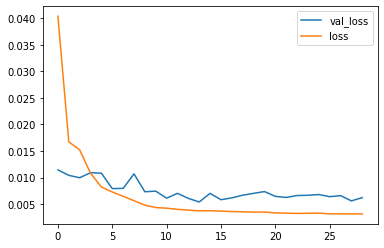

In [ ]:
# plt.fig
plt.plot(result.history['val_loss'],label='val_loss')
plt.plot(result.history['loss'],label='loss')
plt.legend()

In [ ]:
model.load_weights('tem_hum_predict_with_lstm_loc2.h5')

## val_predict

In [ ]:
val_pred= model.predict(val_x)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(val_y,val_pred)

In [ ]:
mse

0.002463584551875395

## test_predict

In [ ]:
test_pred = model.predict(x_test)

In [ ]:
test_pred

array([[0.2777075 , 0.4517385 , 0.2674738 , 0.26157755, 0.5643507 ],
       [0.36644304, 0.32670543, 0.29209346, 0.39795682, 0.28566182],
       [0.25848398, 0.49840623, 0.27548483, 0.18532272, 0.74213374],
       ...,
       [0.41402838, 0.7977774 , 0.2162147 , 0.42584392, 0.83057714],
       [0.34083733, 0.7610496 , 0.1632107 , 0.36602473, 0.8062525 ],
       [0.21631335, 0.6422497 , 0.09555173, 0.2520797 , 0.70358354]],
      dtype=float32)

In [ ]:
inv_pred = mms.inverse_transform(test_pred)

In [ ]:
pred_df48 = pd.DataFrame(inv_pred)

In [ ]:
pred_df48.index = test_p1_loc.index

In [ ]:
pred_df48

,0,1,2,3,4
plant_test.mea_ddhr,,,,,
2019-04-01 04:30:00,7.589572,51.781078,8.396971,3.828623,62.595062
2019-04-01 11:00:00,10.934903,42.677422,9.199326,9.761122,39.056995
2019-04-02 06:00:00,6.864846,55.178959,8.658051,0.511538,77.610619
2019-04-02 07:00:00,6.708007,56.443439,8.419370,0.205333,79.037834
2019-04-02 09:30:00,6.732029,58.724968,8.198131,-0.037413,81.417122
...,...,...,...,...,...
2020-03-28 23:30:00,14.562161,73.531761,8.605585,12.274586,78.738518
2020-03-29 02:30:00,14.064419,76.365990,7.848536,11.936352,83.596184
2020-03-29 03:00:00,12.728870,76.976166,6.726438,10.974211,85.080544


In [ ]:
pred_df.shape,pred_df48.shape

((1698, 6), (1841, 5))

In [ ]:
np.equal(pred_df.index,pred_df48.index)

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
pred_df.rename({0:'tem_24h',1:'hum_24h',2:'tem_coil_24h',3:'tem_out_24h',4:'hum_out_24h'},axis=1,inplace=True)

In [ ]:
pred_df48.rename({0:'tem_48h',1:'hum_48h',2:'tem_coil_48h',3:'tem_out_48h',4:'hum_out_48h'},axis=1,inplace=True)

In [ ]:
pred_df48

,tem_48h,hum_48h,tem_coil_48h,tem_out_48h,hum_out_48h
plant_test.mea_ddhr,,,,,
2019-04-01 04:30:00,7.589572,51.781078,8.396971,3.828623,62.595062
2019-04-01 11:00:00,10.934903,42.677422,9.199326,9.761122,39.056995
2019-04-02 06:00:00,6.864846,55.178959,8.658051,0.511538,77.610619
2019-04-02 07:00:00,6.708007,56.443439,8.419370,0.205333,79.037834
2019-04-02 09:30:00,6.732029,58.724968,8.198131,-0.037413,81.417122
...,...,...,...,...,...
2020-03-28 23:30:00,14.562161,73.531761,8.605585,12.274586,78.738518
2020-03-29 02:30:00,14.064419,76.365990,7.848536,11.936352,83.596184
2020-03-29 03:00:00,12.728870,76.976166,6.726438,10.974211,85.080544


In [ ]:
all_pred_df.shape

(1964, 11)

In [ ]:
swv_48h = prep.swv(pred_df48['tem_48h'],pred_df48['tem_coil_48h'],pred_df48['hum_48h'])

In [ ]:
pred_df48['swv_value'] = swv_48h

In [ ]:
pred_df48

,tem_48h,hum_48h,tem_coil_48h,tem_out_48h,hum_out_48h,swv_value
plant_test.mea_ddhr,,,,,,
2019-04-01 04:30:00,7.589572,51.781078,8.396971,3.828623,62.595062,0.562138
2019-04-01 11:00:00,10.934903,42.677422,9.199326,9.761122,39.056995,0.605985
2019-04-02 06:00:00,6.864846,55.178959,8.658051,0.511538,77.610619,0.574275
2019-04-02 07:00:00,6.708007,56.443439,8.419370,0.205333,79.037834,0.549719
2019-04-02 09:30:00,6.732029,58.724968,8.198131,-0.037413,81.417122,0.509883
...,...,...,...,...,...,...
2020-03-28 23:30:00,14.562161,73.531761,8.605585,12.274586,78.738518,-0.101245
2020-03-29 02:30:00,14.064419,76.365990,7.848536,11.936352,83.596184,-0.164183
2020-03-29 03:00:00,12.728870,76.976166,6.726438,10.974211,85.080544,-0.149474


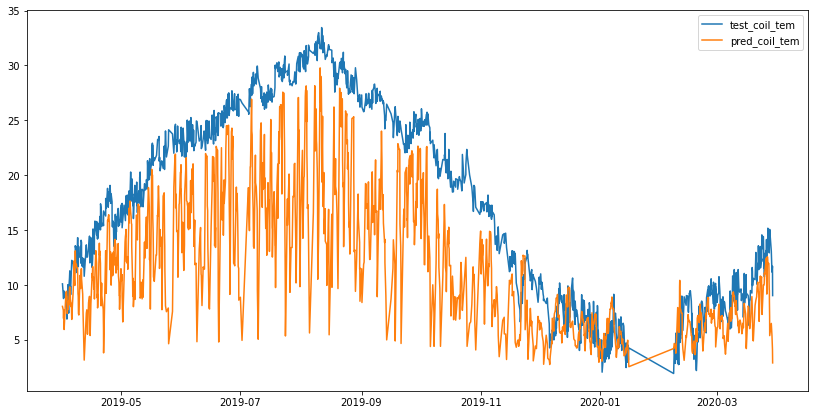

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(test_p1_loc['plant_test.tem_coil'],label = 'test_coil_tem')
plt.plot(pred_df['tem_coil_24h'],label='pred_coil_tem')

# plt.plot(test_p1_loc['plant_test.tem_in'],label = 'test_tem_in')
# plt.plot(all_pred_df['tem_48h'],label='pred_tem_in')

# plt.plot(test_p1_loc['plant_test.tem_out_loc1'],label = 'test_tem_out')
# plt.plot(pred_df['plant_test.tem_out_loc1'],label='pred_tem_out')

plt.legend()

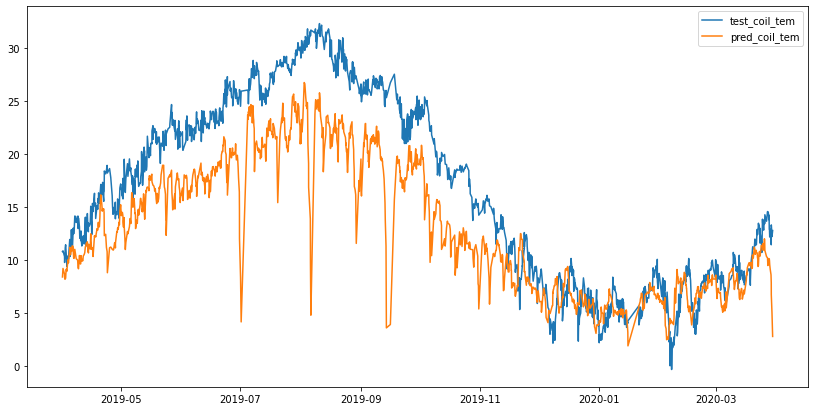

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(test_p1_loc['plant_test.tem_coil'],label = 'test_coil_tem')
plt.plot(pred_df48['tem_coil_48h'],label='pred_coil_tem')

# plt.plot(test_p1_loc['plant_test.tem_in'],label = 'test_tem_in')
# plt.plot(all_pred_df['tem_48h'],label='pred_tem_in')

# plt.plot(test_p1_loc['plant_test.tem_out_loc1'],label = 'test_tem_out')
# plt.plot(pred_df['plant_test.tem_out_loc1'],label='pred_tem_out')

plt.legend()

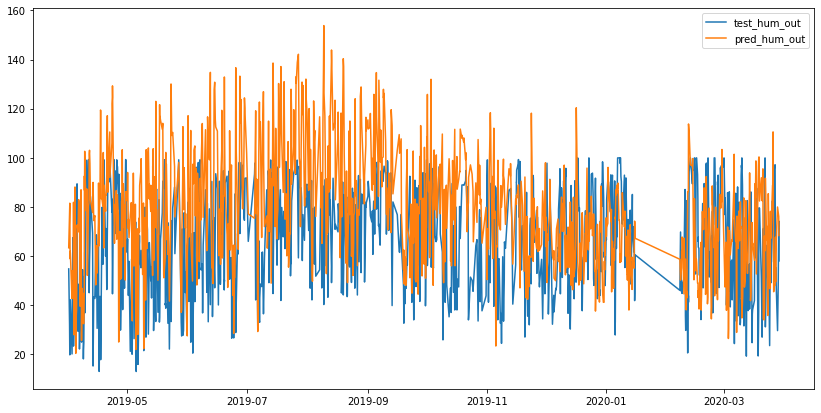

In [ ]:
plt.figure(figsize=(14,7))

# plt.plot(test_p1_loc['plant_test.hum_in'],label = 'test_hum_in')
# plt.plot(pred_df['hum_24h'],label='pred_hum_in')

plt.plot(test_p1_loc['plant_test.hum_out_loc1'],label = 'test_hum_out')
plt.plot(pred_df['hum_out_24h'],label='pred_hum_out')

plt.legend()

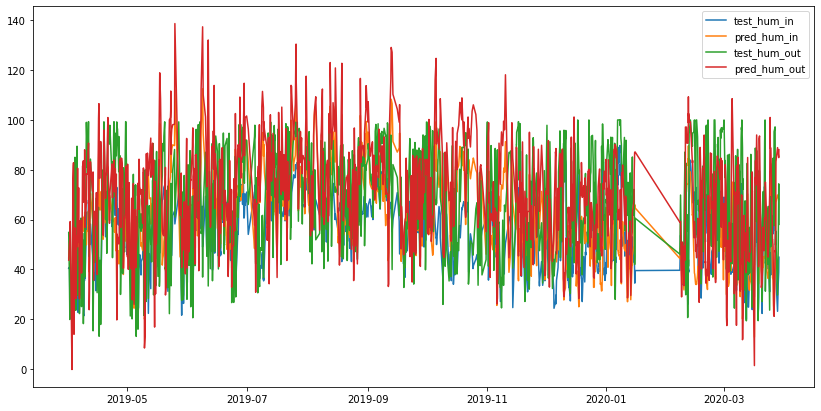

In [ ]:
plt.figure(figsize=(14,7))

plt.plot(test_p1_loc['plant_test.hum_in'],label = 'test_hum_in')
plt.plot(all_pred_df['hum_48h'],label='pred_hum_in')

plt.plot(test_p1_loc['plant_test.hum_out_loc1'],label = 'test_hum_out')
plt.plot(all_pred_df['hum_out_48h'],label='pred_hum_out')

plt.legend()

In [ ]:
pred_swv = prep.swv(pred_df['tem_24h'],pred_df['tem_coil_24h'],pred_df['hum_24h'])
test_swv = prep.swv(test_p1_loc['plant_test.tem_in'],test_p1_loc['plant_test.tem_coil'],test_p1_loc['plant_test.hum_in'])

In [ ]:
pred_df['swv_value'] = pred_swv
test_p1_loc['swv_value'] = test_swv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
coil = pd.read_csv('plant1_test_coil_predict.csv')
coil.shape

(1841, 15)

In [ ]:
coil.columns

Index(['Unnamed: 0', 'plant_test.mea_ddhr', 'plant_test.plant',
       'plant_test.loc', 'plant_test.tem_in', 'plant_test.hum_in',
       'plant_test.tem_coil', 'plant_test.tem_out_loc1',
       'plant_test.hum_out_loc1', 'plant_test.x24h_tma',
       'plant_test.x24h_cond_loc', 'plant_test.x48h_tma',
       'plant_test.x48h_cond_loc', 'datetime', 'pred_coil_24h'],
      dtype='object')

In [ ]:
coil.index= pd.to_datetime(coil['datetime'])

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(coil['pred_coil_24h'],label='pred_coil')
plt.plot(test_p1_loc['plant_test.tem_coil'],label='test_coil')

plt.legend()

In [ ]:
pred_df['pred_coil_24h'] = coil['pred_coil_24h']

In [ ]:
pred_swv= prep.swv(pred_df['plant_test.tem_in'],pred_df['pred_coil_24h'],pred_df['plant_test.hum_in'])

In [ ]:
pred_df['swv_value'] = pred_swv

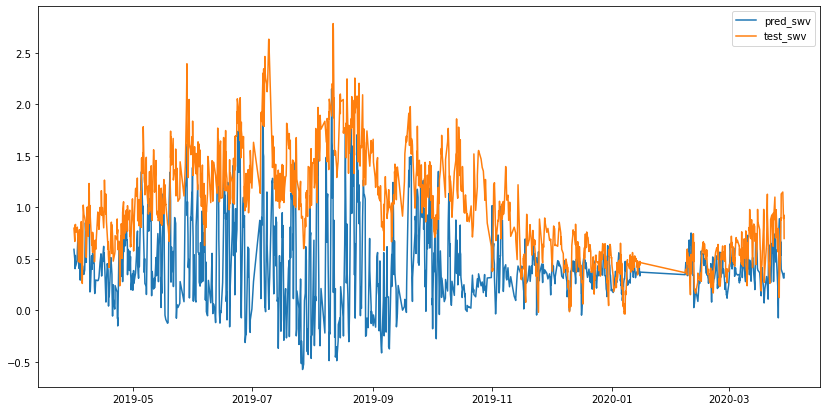

In [ ]:
plt.figure(figsize=(14,7))

plt.plot(pred_df['swv_value'],label='pred_swv')
plt.plot(test_p1_loc['swv_value'],label='test_swv')

plt.legend()

In [ ]:
pred_df48.shape

(1841, 6)

In [ ]:
# pred_df.to_csv('plant2_test_predict24_temhum_all.csv',index=False)
pred_df48.to_csv('plant1_test_predict48_temhum_all.csv',index=False)